# EDA

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [15]:
data = pd.read_csv('clean_data.csv')

In [16]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7015 entries, 0 to 7014
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               7015 non-null   object 
 1   gender                   7015 non-null   int64  
 2   SeniorCitizen            7015 non-null   int64  
 3   Partner                  7015 non-null   int64  
 4   Dependents               7015 non-null   int64  
 5   tenure                   7015 non-null   int64  
 6   PhoneService             7015 non-null   int64  
 7   MultipleLines            7015 non-null   int64  
 8   IntrntSrvc_DSL           7015 non-null   bool   
 9   IntrntSrvc_FiberOptic    7015 non-null   bool   
 10  IntrntSrvc_No            7015 non-null   bool   
 11  OnlineSecurity           7015 non-null   int64  
 12  OnlineBackup             7015 non-null   int64  
 13  DeviceProtection         7015 non-null   int64  
 14  TechSupport             

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,IntrntSrvc_DSL,IntrntSrvc_FiberOptic,...,Contract_OneYear,Contract_TwoYear,PaperlessBilling,PayMthd_BankTransfer,PayMthd_CreditCard,PayMthd_ElectronicCheck,PayMthd_MailedCheck,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,True,False,...,False,False,1,False,False,True,False,29.84,29.84,0
1,5575-GNVDE,1,0,0,0,34,1,0,True,False,...,True,False,0,False,False,False,True,56.94,1890.00,0
2,3668-QPYBK,1,0,0,0,2,1,0,True,False,...,False,False,1,False,False,False,True,53.84,108.10,1
3,7795-CFOCW,1,0,0,0,45,0,0,True,False,...,True,False,0,True,False,False,False,42.30,1841.00,0
4,9237-HQITU,0,0,0,0,2,1,0,False,True,...,False,False,1,False,False,True,False,70.70,151.60,1


# Pair plot of some crucial features

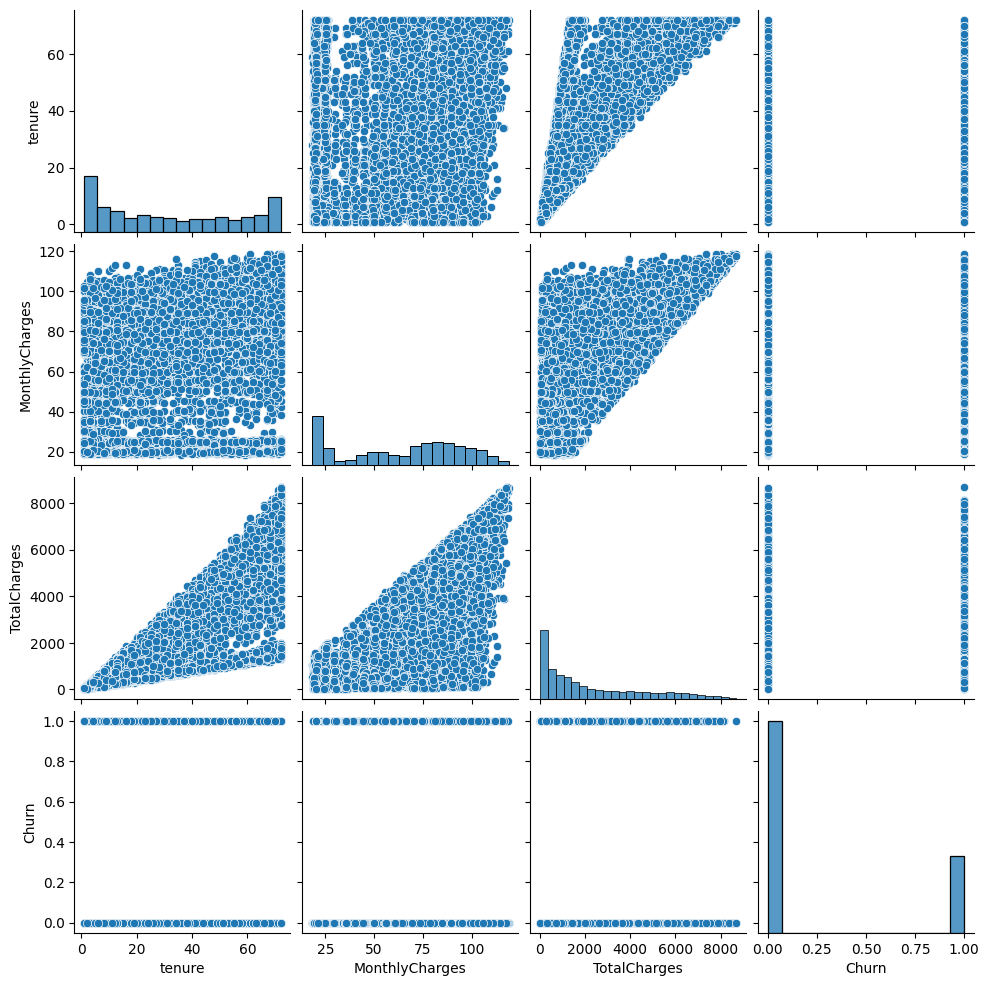

In [17]:
# Create a pair plot
columns = ['tenure','MonthlyCharges','TotalCharges','Churn']
sns.pairplot(data[columns])
plt.show()

##### The pair plot of seemingly important features of the data to idnetify initial trends among data for churn prediction.

## Churn value Pie chart

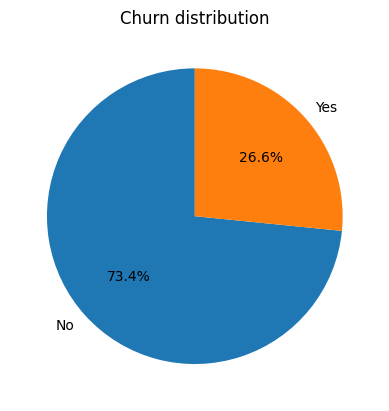

In [18]:
churn_cnt = data['Churn'].value_counts()

#Pie Chart
plt.pie(churn_cnt, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
plt.title('Churn distribution')
plt.show()

##### The churn data shows 26.6% of customers as churned while rest 73.4% of the customers stayed with the company. It can be induced from this pie chart that more than quarter of the customers has left. 

# Churn distribution based on gender

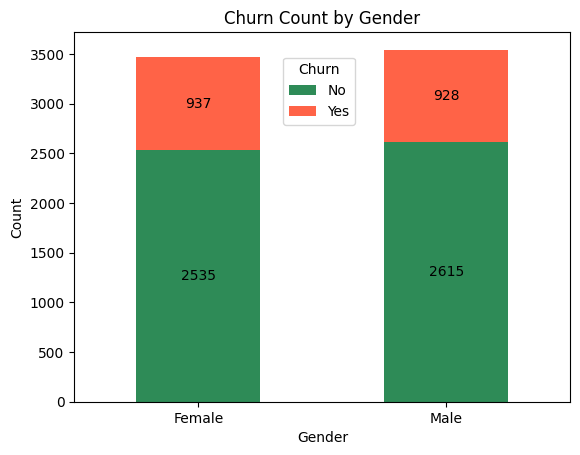

In [19]:
# Map gender and churn values to more descriptive labels
plot_data = {'Gender': data['gender'].map({0: 'Female', 1: 'Male'}),
             'Churn': data['Churn'].map({0: 'No', 1: 'Yes'})}
plot_df = pd.DataFrame(plot_data)

ct = pd.crosstab(plot_df['Gender'], plot_df['Churn'])
ax = ct.plot(kind='bar', stacked=True, color=['seagreen', 'tomato'])
plt.title('Churn Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right', bbox_to_anchor=(0.58, 0.95))

# Add counts inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='black')

plt.show()

# Chrun distribution by Senior Citizens

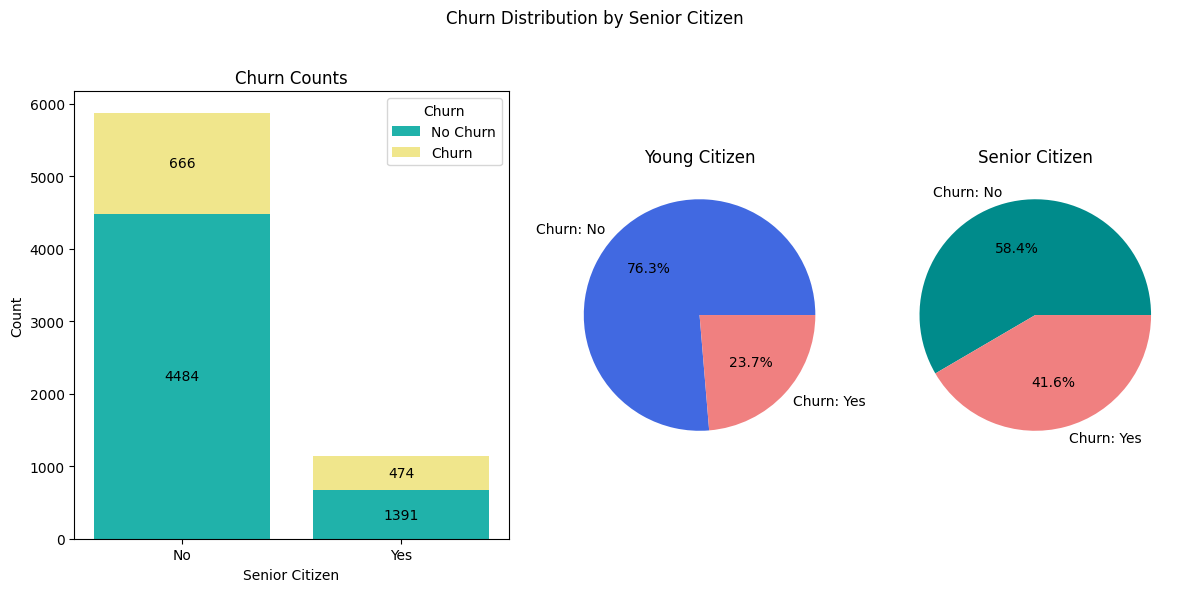

In [20]:
plot_data = {'Senior Citizen': data['SeniorCitizen'].map({0: 'No', 1: 'Yes'}),
             'Churn': data['Churn'].map({0: 'No', 1: 'Yes'})}
plot_df = pd.DataFrame(plot_data)

# Create crosstab for counts
ct = pd.crosstab(plot_df['Senior Citizen'], plot_df['Churn'])

# Create a custom layout using gridspec
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 2, 2])


# First subplot (whole left side)
ax0 = plt.subplot(gs[0])
ax0.bar(ct.index, ct['No'], color='lightseagreen', label='No Churn')
ax0.bar(ct.index, ct['Yes'], bottom=ct['No'], color='khaki', label='Churn')
ax0.set_title('Churn Counts')
ax0.set_xlabel('Senior Citizen')
ax0.set_ylabel('Count')
ax0.set_xticks(range(len(ct.index)))
ax0.set_xticklabels(ct.index, rotation=0)
ax0.legend(title='Churn')
# Add counts inside the bars
for p, count in zip(ax0.patches, ct.values.flatten()):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax0.text(x + width / 2, y + height / 2, f'{int(count)}', ha='center', va='center', fontsize=10, color='black')


#Second subplot (top right)
ax1 = plt.subplot(gs[1])
ax1.pie(ct.loc['No'], labels=['Churn: No', 'Churn: Yes'], autopct='%1.1f%%', colors=['royalblue', 'lightcoral'])
ax1.set_title('Young Citizen')

#Third subplot (bottom right)
ax2 = plt.subplot(gs[2])
ax2.pie(ct.loc['Yes'], labels=['Churn: No', 'Churn: Yes'], autopct='%1.1f%%', colors=['darkcyan', 'lightcoral'])
ax2.set_title('Senior Citizen')

plt.suptitle('Churn Distribution by Senior Citizen')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to prevent clipping of the suptitle
plt.show()


#### We can clearly see from the bar plot that young people (No for senior citizen) leaves more compared to the senior citizens countwise. But when compared in each category it is clear from the pie charts that almost 42% of senior citizens left which is nearly double the percentage of Young citizens (Senior Citizens = No) left.

# Chrun distribution by Partner

In [35]:
def plot_dist(feature,data):
    plot_data = {f'{feature}': data[feature].map({0: 'No', 1: 'Yes'}),
             'Churn': data['Churn'].map({0: 'No', 1: 'Yes'})}
    plot_df = pd.DataFrame(plot_data)

    # Create crosstab for counts
    ct = pd.crosstab(plot_df[feature], plot_df['Churn'])

    # Create a custom layout using gridspec
    fig = plt.figure(figsize=(12, 6))
    gs = gridspec.GridSpec(1, 3, width_ratios=[3, 2, 2])


    # First subplot (whole left side)
    ax0 = plt.subplot(gs[0])
    ax0.bar(ct.index, ct['No'], color='lightseagreen', label='No Churn')
    ax0.bar(ct.index, ct['Yes'], bottom=ct['No'], color='khaki', label='Churn')
    ax0.set_title('Churn Counts')
    ax0.set_xlabel(f'{feature}')
    ax0.set_ylabel('Count')
    ax0.set_xticks(range(len(ct.index)))
    ax0.set_xticklabels(ct.index, rotation=0)
    ax0.legend(loc = (1.2,1), title='Churn')
    # Add counts inside the bars
    for p, count in zip(ax0.patches, ct.values.flatten()):
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax0.text(x + width / 2, y + height / 2, f'{int(count)}', ha='center', va='center', fontsize=10, color='black')


    plt.suptitle(f'Churn Distribution by {feature}')
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to prevent clipping of the suptitle
    plt.show()


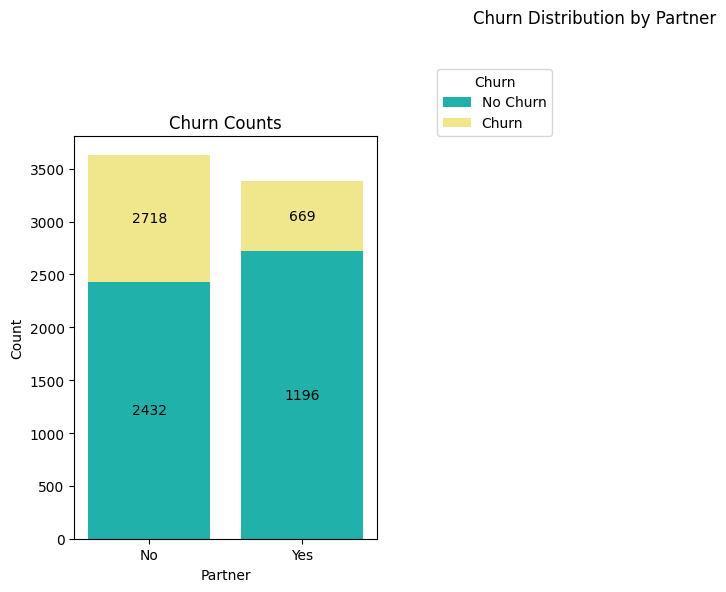

In [36]:
plot_dist('Partner',data)

# Chrun distribution by Dependent

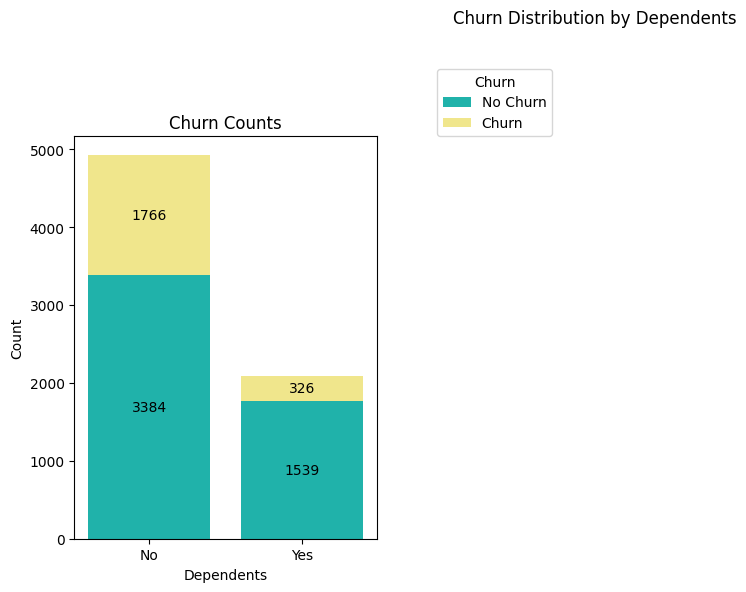

In [37]:
plot_dist('Dependents',data)

# Chrun distribution by PhoneService

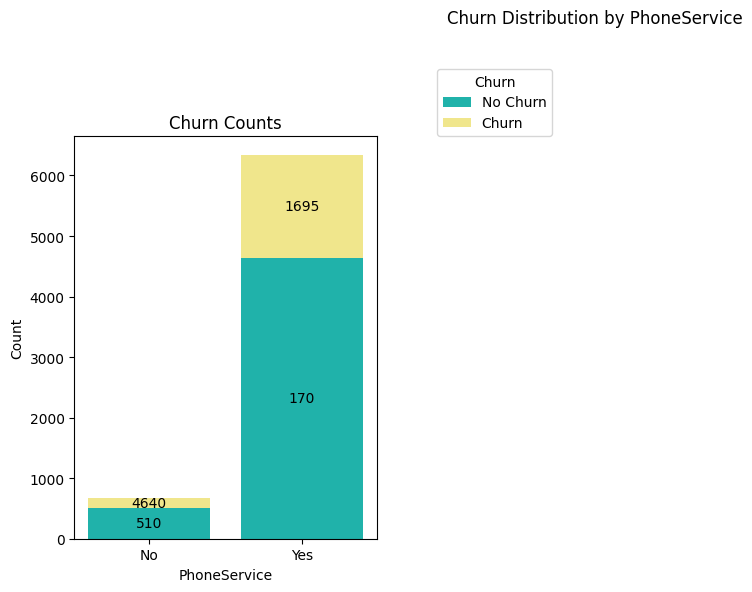

In [38]:
plot_dist('PhoneService',data)

# Chrun distribution by MultipleLines

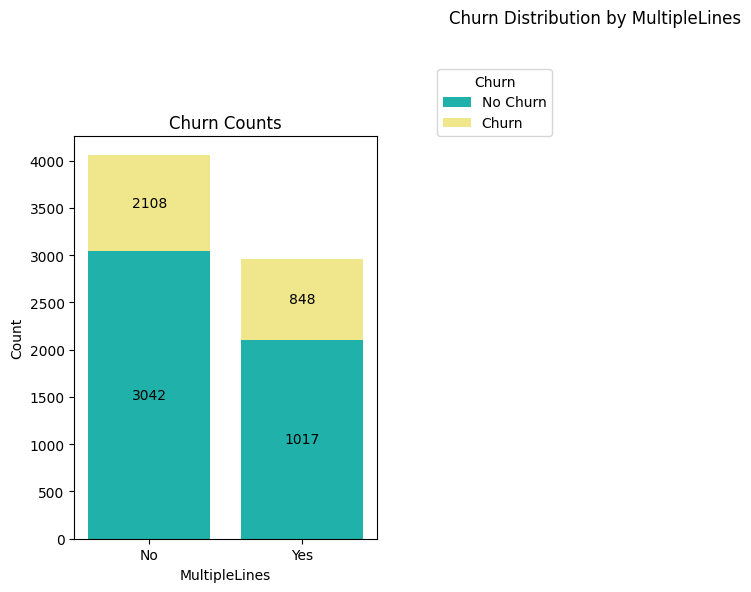

In [63]:
plot_dist('MultipleLines',data)

# Chrun distribution by OnlineSecurity

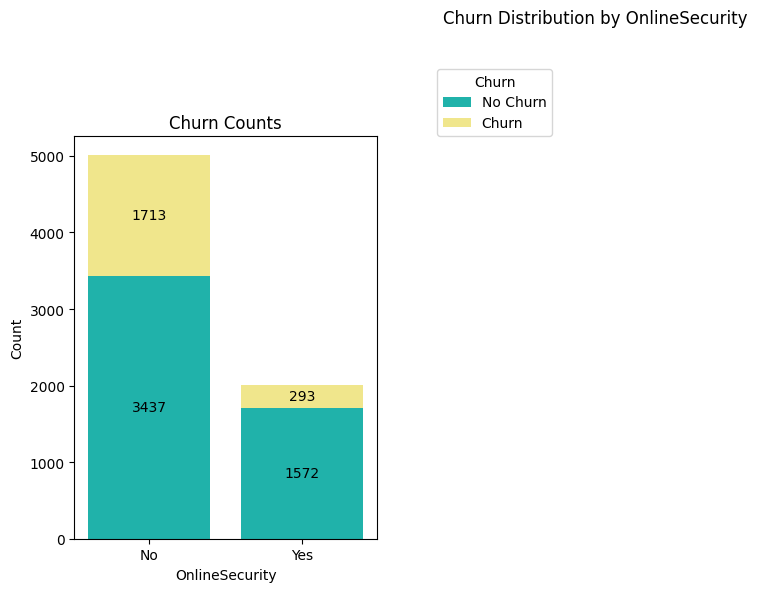

In [64]:
plot_dist('OnlineSecurity',data)

# Chrun distribution by OnlineBackup

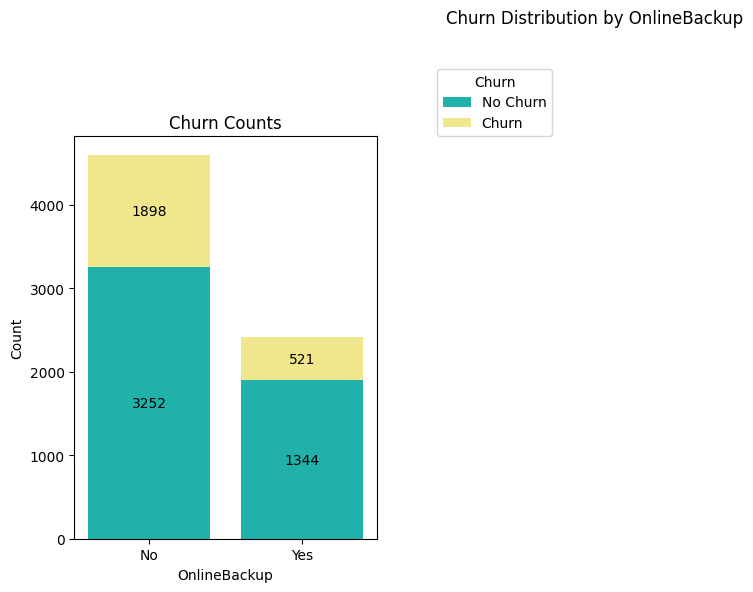

In [65]:
plot_dist('OnlineBackup',data)

# Chrun distribution by DeviceProtection

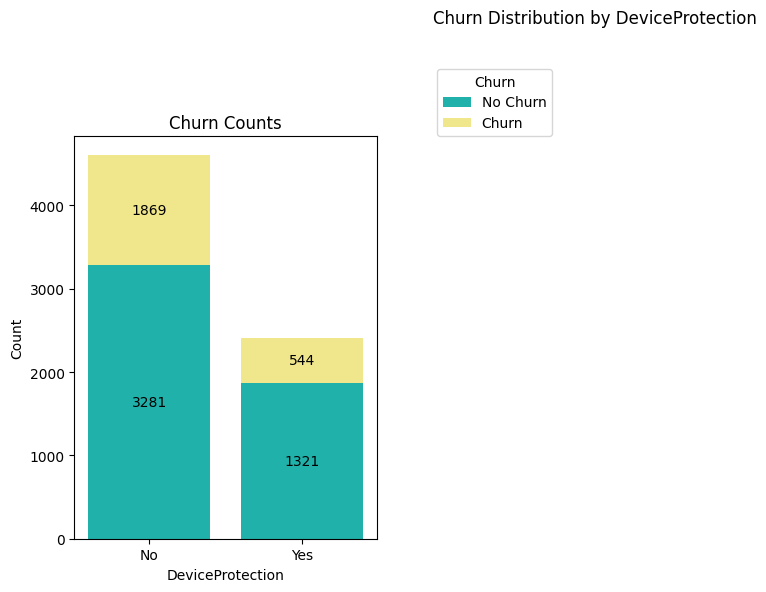

In [66]:
plot_dist('DeviceProtection',data)

# Chrun distribution by TechSupport

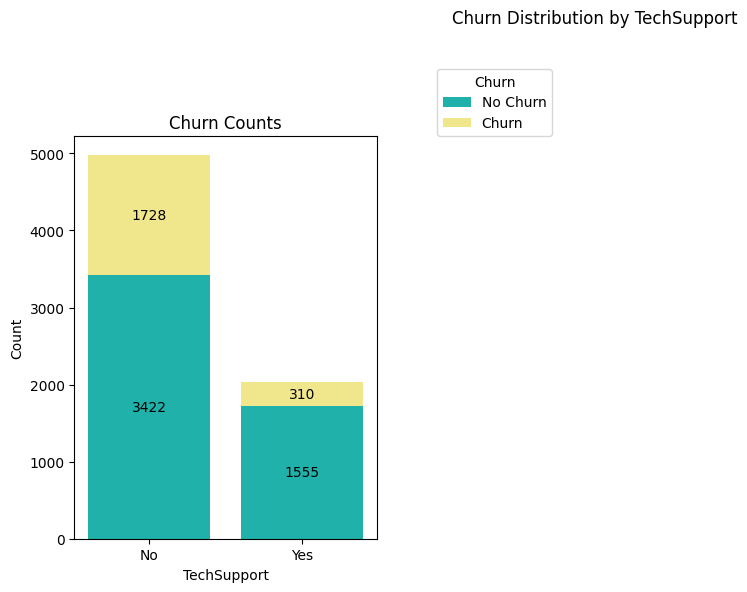

In [67]:
plot_dist('TechSupport',data)

# Chrun distribution by StreamingTV

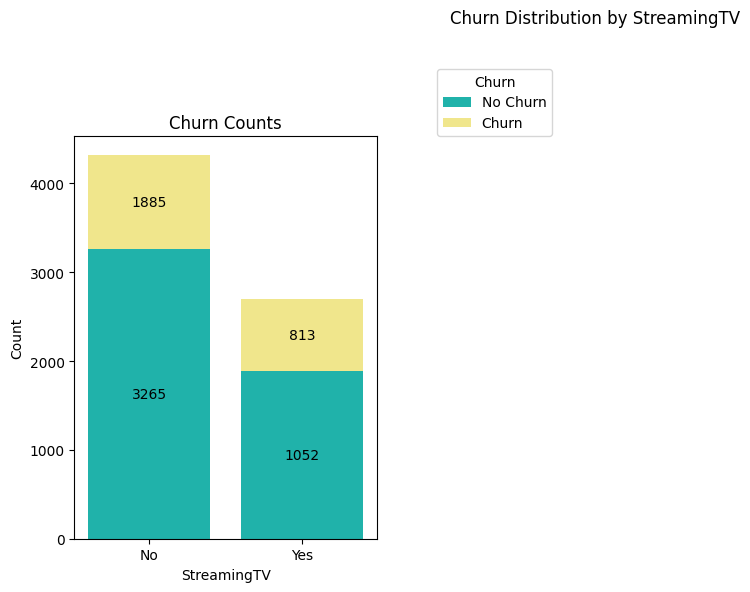

In [68]:
plot_dist('StreamingTV',data)

# Chrun distribution by StreamingMovies

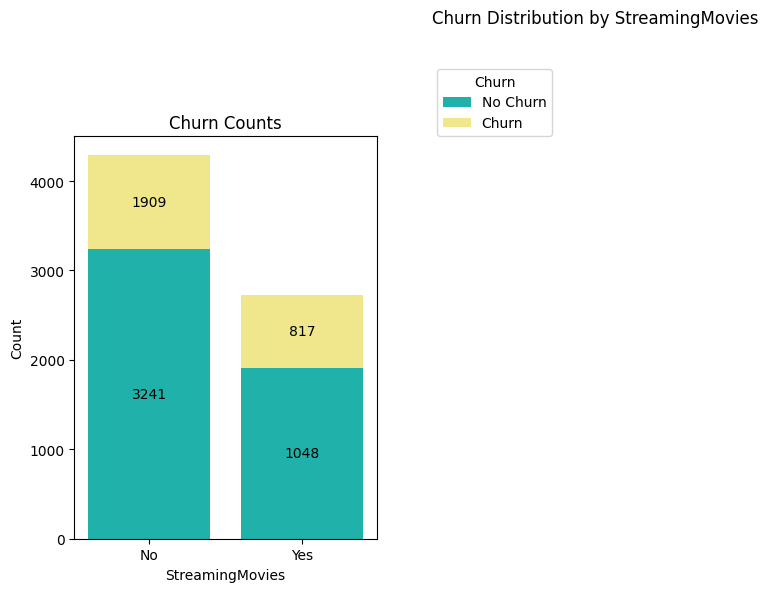

In [69]:
plot_dist('StreamingMovies',data)

# Chrun distribution by PaperlessBilling

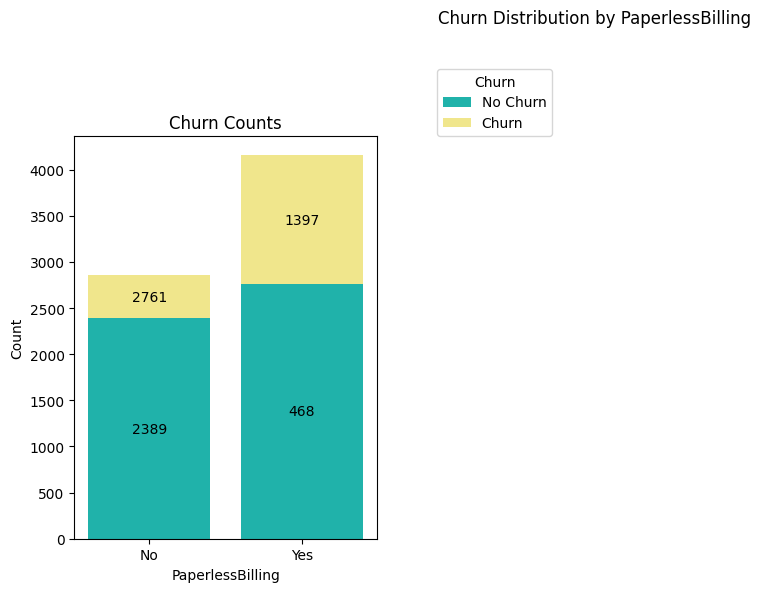

In [70]:
plot_dist('PaperlessBilling',data)

# Unable to plot

In [62]:
# plot_dist('PaymentMethod',data)
# plot_dist('InternetService',data)
# plot_dist('Contract',data)
# plot_dist('PaymentMethod',data)


KeyError: 'PaymentMethod'

In [93]:
# def plot_histogram(feature,data):
#     gb_feature_df = data.groupby([feature,'Churn']).size().reset_index()
#     gb_feature_df = gb_feature_df.rename(columns={0:'Count'})
#     print(gb_feature_df.head())
#     plt.figure(figsize=(10, 6))
#     sns.histplot(data=gb_feature_df, x=feature,y='Count', hue='Churn', bins=20, kde=True)
#     plt.title(f'Churn rate frequency to {feature} distribution')
#     plt.xlabel(feature)
#     plt.ylabel('Count')
#     plt.legend(title='Churn', labels=['No Churn', 'Churn'])
#     plt.show()

# Churn Amount VS Tenure

In [96]:
# plot_histogram('tenure',data)

# Churn Amount VS MonthlyCharges

In [97]:
# plot_histogram('MonthlyCharges',data)

# Churn Amount VS TotalCharges